# Data Cleaning

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

df = pd.read_csv('data/raw_survey_data_2022.csv',header=1)

from datetime import datetime

data1=df.iloc[:,1] #DataFrame with start time
data2=df.iloc[:,2] #DataFrame with end time
data3=df.iloc[:,3:] #DataFrame with data

data3["time"]=data2.apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))-data1.apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))
#(data1.iloc[:,1].values.astype('datetime64[D]')-data1.iloc[:,0].values.astype('datetime64[D]'))

                                                                                                    
index_time= data3["time"].apply(lambda x: x/np.timedelta64(1, 's'))

data3['clean']=(index_time>200)&(data3.iloc[:,176-3]=='2')&(data3.iloc[:,306-3]=='4')

df=data3.loc[data3.clean==True].iloc[:,:-2]
df.shape

n = 1271

In [3]:
df.head(10)

,Response,Academics,Mental health,Physical health,Professional development,Social life,Career Placement Team,Housing,Intercampus Shuttle/Via Service,Library services,...,Prefer to self-describe,Response.51,Response.52,Other (please specify).8,Response.53,Other (please specify).9,Response.54,Response.55,Response.56,Open-Ended Response.15
0,Agree,Strongly agree,Agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,...,NaN,No,Multiracial background,NaN,Jamaica (NA),NaN,less than 18,Yes,Yes,NaN
2,Disagree,Disagree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Agree,Strongly agree,Agree,...,NaN,No,South Asian,NaN,India (AS),NaN,21-23,Yes,Yes,NaN
5,Agree,Strongly agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Disagree,Disagree,Agree,...,NaN,No,East Asian,NaN,NaN,NaN,21-23,No,Yes,NaN
6,Agree,Disagree,Disagree,Neither agree nor disagree,Strongly agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,...,NaN,No,Multiracial background,NaN,Guyana (SA),NaN,21-23,Yes,Yes,Maybe Professors can be a little more flexible...
7,Neither agree or disagree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Strongly disagree,Agree,Neither agree nor disagree,...,NaN,I prefer not to answer,East Asian,NaN,China (AS),NaN,24-26,No,No,NaN
8,Agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Strongly agree,...,NaN,No,NaN,NaN,NaN,NaN,21-23,No,Yes,NaN
9,Neither agree or disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,...,NaN,No,NaN,NaN,NaN,NaN,21-23,No,No,NaN
10,Disagree,Strongly agree,Neither agree nor disagree,Agree,Disagree,Strongly agree,Disagree,Neither agree nor disagree,Strongly agree,Agree,...,NaN,No,East Asian,NaN,China (AS),NaN,21-23,Yes,Yes,DO A better job for cs departments career serv...
11,Agree,Agree,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Strongly agree,Strongly agree,...,NaN,No,East Asian,NaN,China (AS),NaN,24-26,No,No,NaN
12,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,...,NaN,No,East Asian,NaN,China (AS),NaN,24-26,No,No,NaN


# Overview - Demographics

## Gender

In [4]:
gender = df[["Female", "Male", "Non-binary", "Do not identify as female, male, or non-binary", 
             "I prefer not to answer", "Prefer to self-describe"]]

gender.dropna(how="all")
print(gender.count())

Female                                            479
Male                                              705
Non-binary                                         15
Do not identify as female, male, or non-binary      1
I prefer not to answer                             45
Prefer to self-describe                             2
dtype: int64


In [5]:
gender["Prefer to self-describe"].value_counts()

i am a plate    1
-               1
Name: Prefer to self-describe, dtype: int64

<AxesSubplot:ylabel='None'>

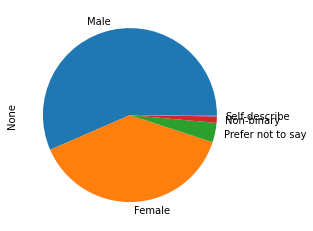

In [6]:
gender_plot = pd.Series([705, 479, 45, 15, 3], 
                        index=["Male", "Female", "Prefer not to say", "Non-binary", "Self-describe"])
gender_plot.plot(kind="pie")

<AxesSubplot:ylabel='None'>

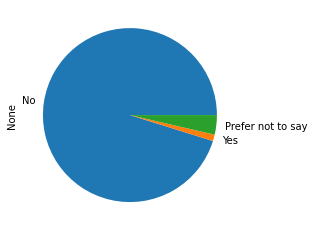

In [7]:
LGBTQ_plot = pd.Series([1184, 15, 45], index=["No", "Yes", "Prefer not to say"])
LGBTQ_plot.plot(kind="pie")

In [23]:
# merge to one column
df.loc[df.Female.notna(), 'gender'] = 'Female'
df.loc[df.Male.notna(),'gender'] = 'Male'
df.loc[df['Non-binary'].notna(),'gender'] = 'Non-binary'
df.loc[df['I prefer not to answer'].notna(),'gender'] = 'Not to say'

df.drop(["Female", "Male", "Non-binary", "Do not identify as female, male, or non-binary", 
         "I prefer not to answer", "Prefer to self-describe"], axis=1)
df.gender.value_counts()

Male          701
Female        477
Not to say     45
Non-binary     15
Name: gender, dtype: int64

## Degree

In [70]:
degree = df.iloc[:, 68]
print(degree.value_counts() / 1271)
print(degree.value_counts())

# df.columns.values[68] = "degree"
# can't access a column with the new name after 'renaming'
df = df.rename(columns={df.columns.tolist()[68]:'degree'});

Master of Science (M.S.)        0.777341
Doctor of Philosophy (Ph.D.)    0.163651
M.S. leading to Ph.D.           0.058222
Professional Degree             0.000787
Name: degree, dtype: float64
Master of Science (M.S.)        988
Doctor of Philosophy (Ph.D.)    208
M.S. leading to Ph.D.            74
Professional Degree               1
Name: degree, dtype: int64


## Department

In [60]:
df = df.rename(columns={df.columns.tolist()[67]:'department'})

df.department.value_counts()

Industrial Engineering and Operations Research    314
Computer Science                                  274
Electrical Engineering                            148
Biomedical Engineering                            138
Mechanical Engineering                             95
Data Science Institute                             76
Chemical Engineering                               68
Civil Engineering and Engineering Mechanics        62
Applied Physics and Applied Mathematics            58
Earth and Environmental Engineering                29
I prefer not to answer.                             9
Name: department, dtype: int64

## Semesters

In [62]:
df = df.rename(columns={df.columns.tolist()[66]:'semester'})

df.semester.value_counts()

2 semesters                446
1 semester                 430
3 semesters                177
4 semesters                 47
10 semesters or more        35
5 semesters                 29
7 semesters                 29
less than 1                 27
6 semesters                 19
8 semesters                 16
9 semesters                 13
I prefer not to answer.      3
Name: semester, dtype: int64

# Housing

In [304]:
housing = df.iloc[:, 274:296]
housing.columns

Index(['Response.35', 'application_satisfy', 'transfer_satisfy',
       'Open-Ended Response.12', 'Helpfulness of building superintendent',
       'Helpfulness of door attendant', 'Apartment renovations',
       'Building maintenance (regular cleaning, intercoms, elevators, etc.)',
       'Building Security', 'Cost.1', 'Quality of Internet Service',
       'Response.38', 'Unavailability of Columbia Residential units',
       'Housing cost', 'Housing location', 'Choice of accommodation(s)',
       'Choice of roommate(s)', 'Not Applicable', 'Other (please specify).5',
       'Response.39', 'Response.40', 'Open-Ended Response.13'],
      dtype='object')

### Location

In [83]:
df = df.rename(columns={df.columns.tolist()[274]:'location'})

print(df.location.value_counts() / n)
print(df.location.value_counts())

print("\nMasters:")
print(df.loc[df['degree']=='Master of Science (M.S.)', 'location'].value_counts() / 988)

print("\nPhD:")
print(df.loc[df['degree']=='Doctor of Philosophy (Ph.D.)', 'location'].value_counts() / 208)

print("\nOff-campus:")
print(df.loc[df['location']=='Off-campus', 'degree'].value_counts() / 867)

print("\n:")
print(df.loc[df['location']=='Columbia Residential (formerly known as University Apartment Housing (UAH))', 
             'degree'].value_counts() / 364)

Off-campus                                                                     0.682140
Columbia Residential (formerly known as University Apartment Housing (UAH))    0.286389
International House                                                            0.031471
Name: location, dtype: float64
Off-campus                                                                     867
Columbia Residential (formerly known as University Apartment Housing (UAH))    364
International House                                                             40
Name: location, dtype: int64

Masters:
Off-campus                                                                     0.781377
Columbia Residential (formerly known as University Apartment Housing (UAH))    0.182186
International House                                                            0.036437
Name: location, dtype: float64

PhD:
Columbia Residential (formerly known as University Apartment Housing (UAH))    0.658654
Off-campus                  

In [303]:
# Satisfaction with Columbia Residential

df = df.rename(columns={df.columns.tolist()[275]:'application_satisfy'})
df = df.rename(columns={df.columns.tolist()[276]:'transfer_satisfy'})

print(df['application_satisfy'].value_counts())
print('\n')
print(df['transfer_satisfy'].value_counts())

Agree                         166
Neither agree nor disagree     61
Disagree                       54
Strongly agree                 46
Strongly disagree              37
Name: application_satisfy, dtype: int64


Neither agree nor disagree    185
Agree                          67
Strongly disagree              54
Disagree                       37
Strongly agree                 21
Name: transfer_satisfy, dtype: int64


In [95]:
# OCHA

OCHA = df['Response.39']
OCHA.value_counts().sum() - 621


610

In [92]:
# safe

safe = df['Response.40']
safe.value_counts()

Agree                         512
Neither agree nor disagree    257
Disagree                      242
Strongly agree                140
Strongly disagree              80
Name: Response.40, dtype: int64

### Satisfaction with Residential Management

In [305]:
management = df[['Helpfulness of door attendant', 'Apartment renovations',
       'Building maintenance (regular cleaning, intercoms, elevators, etc.)',
       'Building Security', 'Cost.1', 'Quality of Internet Service']]

management

,Helpfulness of door attendant,Apartment renovations,"Building maintenance (regular cleaning, intercoms, elevators, etc.)",Building Security,Cost.1,Quality of Internet Service
0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
5,Neither agree nor disagree,Strongly disagree,Disagree,Disagree,Strongly agree,Agree
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1585,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Agree
1586,NaN,NaN,NaN,NaN,NaN,NaN
1587,Agree,Agree,Neither agree nor disagree,Agree,Strongly agree,Agree
1588,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
management_t = pd.concat([count_proportion(df['Helpfulness of door attendant']), 
                           count_proportion(df['Apartment renovations']), 
                           count_proportion(df['Building maintenance (regular cleaning, intercoms, elevators, etc.)']), 
                           count_proportion(df['Building Security']), 
                           count_proportion(df['Cost.1']), 
                           count_proportion(df['Quality of Internet Service'])], axis=1)

c_management_t = ['Helpfulness of door attendant', 'Apartment renovations',
       'Building maintenance',
       'Building Security', 'Cost', 'Quality of Internet Service']

management_t.columns = c_management_t

management_t

,Helpfulness of door attendant,Apartment renovations,Building maintenance,Building Security,Cost,Quality of Internet Service
Strongly agree,22.252747,12.087912,21.153846,20.604396,12.637363,26.098901
Agree,28.021978,38.461538,52.747253,43.131868,38.461538,44.230769
Neutral,40.659341,25.000000,12.087912,20.054945,19.505495,8.791209
Disagree,4.670330,15.934066,10.439560,12.087912,19.780220,11.263736
Strongly disagree,4.395604,8.516484,3.571429,4.120879,9.615385,9.615385


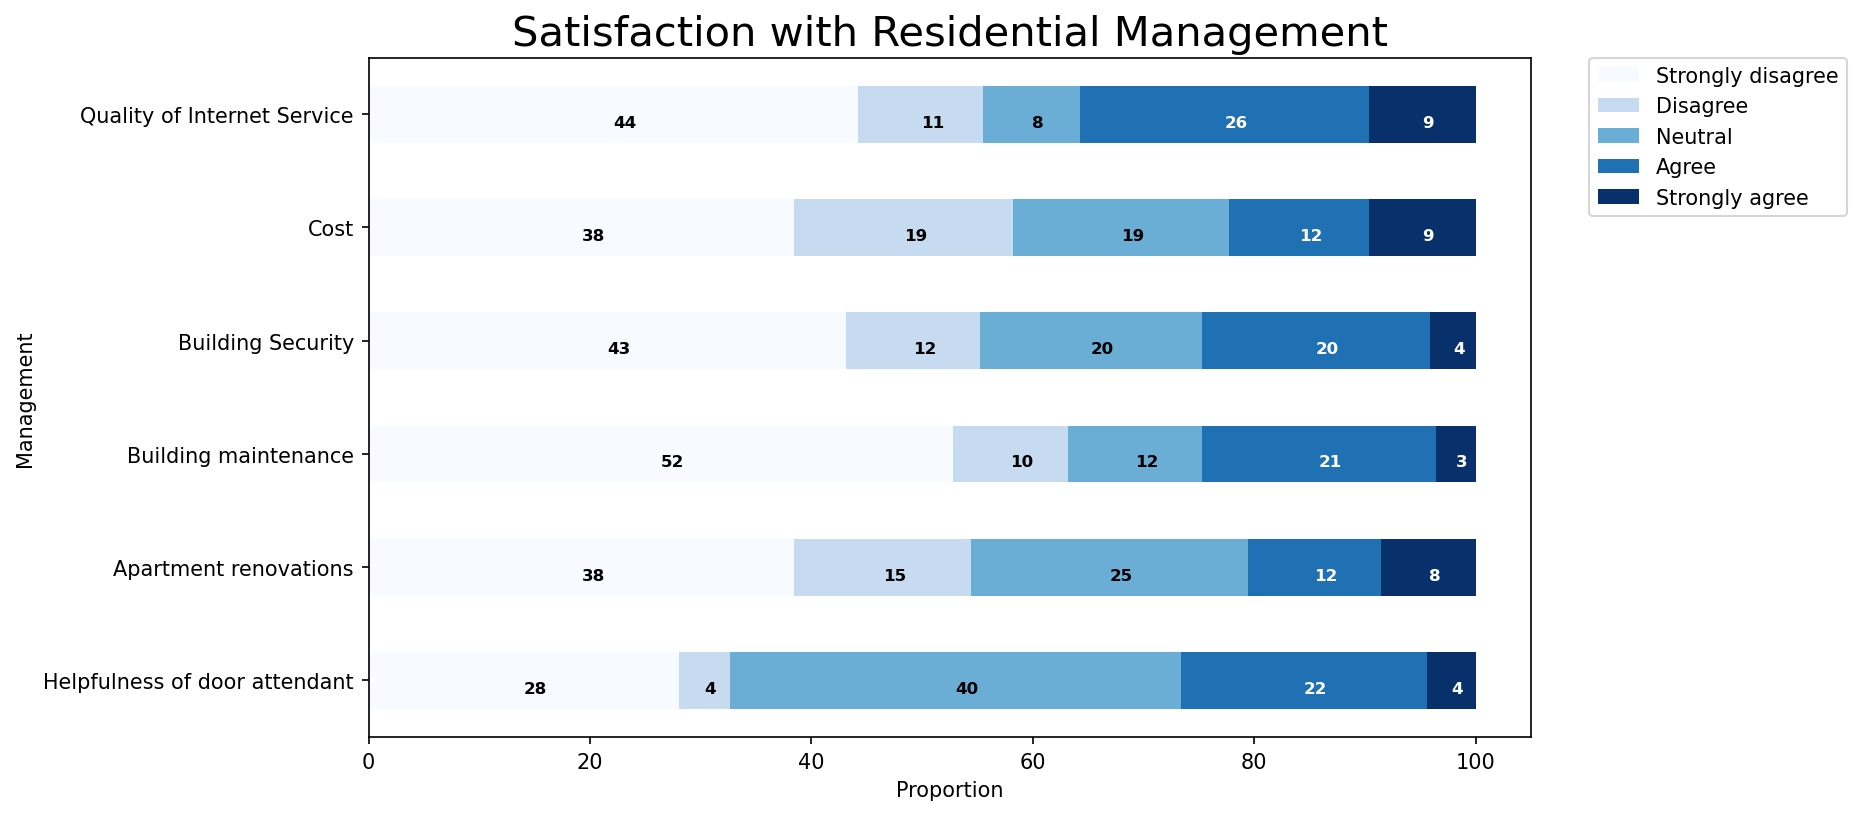

In [310]:
stack_func(management_t, "Proportion", "Management", "Satisfaction with Residential Management", agree_index)

## Academics: Integrity

In [117]:
integrity = df.iloc[:, 307:333]
integrity.columns

Index(['The academic integrity policies were clearly communicated:',
       'My classmates adhered to the university policies on academic integrity:',
       'The academic integrity policies were enforced by TAs or course instructors:',
       'Response.45', 'Response.46', 'I did not want to report a friend.',
       'I did not want to report a classmate.',
       'I was uncertain of the confidentiality of the process.',
       'I was uncomfortable approaching authority figures (i.e. faculty and/or administration).',
       'I thought the violation was not severe.',
       'I did not know how to report the violation.',
       'Other (please specify).7', 'Response.47', 'Warning by TA',
       'Warning by Professor', 'Academic penalty imposed by Professor',
       'Violation referral made to the Office of Graduate Student Affairs',
       'No action was taken', 'Response.48', 'Response.49', 'Not Applicable.1',
       'I am finding the course load too heavy to manage',
       'I do not un

### score stack

In [110]:
communicated = df['The academic integrity policies were clearly communicated:']
communicated.value_counts()
(693*4+434*5+3*111+23*2+10*1)/(693+434+111+23+10)

enforced = df['The academic integrity policies were enforced by TAs or course instructors:']
enforced.value_counts()
(654*4+372*5+158*3+64*2+23*1)/(654+372+158+64+23)

classmates = df['My classmates adhered to the university policies on academic integrity:']
classmates.value_counts()
(599*4+304*5+225*3+95*2+48*1)/(599+304+225+95+48)

3.7993705743509048

### Report

In [112]:
aware = df['Response.45']
aware.value_counts()

No          858
Not Sure    286
Yes         127
Name: Response.45, dtype: int64

In [129]:
report = df['Response.46']
report.value_counts() #sum up to 146

No                                                              92
Yes, I reported it to the Instructor/Professor                  32
Yes, I reported it to the TA                                    11
Yes, I reported it to both TA and Instructor                     9
Yes, I reported it to the Office of Graduate Student Affairs     2
Name: Response.46, dtype: int64

In [126]:
# reasons for not reporting

friend = df['I did not want to report a friend.'].notna().sum()
print(friend)

mate = df['I did not want to report a classmate.'].notna().sum()
print(mate)

confidentiality = df['I was uncertain of the confidentiality of the process.'].notna().sum()
print(confidentiality)

authority = df['I was uncomfortable approaching authority figures (i.e. faculty and/or administration).'].notna().sum()
print(authority)

not_severe = df['I thought the violation was not severe.'].notna().sum()
print(not_severe)

dkhow = df['I did not know how to report the violation.'].notna().sum()
print(dkhow)

others = df['Other (please specify).7'].dropna()
print(others.count())
others

21
30
18
18
21
12
18


41                        Professor seemes unapproachable
100     The students were already excommunicated from ...
110                       I didn't have tangible evidence
111     We all exchange pieces of codes for homework a...
149                           Someone had already done it
183                              Someone else reported it
600                Heard rumors - do not know the details
646                             Haven't met the situation
683                      was not 10 sure of the violation
779     He disguised me to give him the answer, so tec...
1052    I have seen how the university dealt with simi...
1095                                The professor told us
1113    I was not in the class - I heard it from a fri...
1170    People were talking during my controls final. ...
1200    I am the TA for a class and I am aware that st...
1232    It was already reported and handled by the tim...
1239    I didn’t have any proof and didn’t really want...
1536          

### TA 

In [140]:
TA = df['Response.47']
TA.value_counts()

I did not serve as a TA    833
No                         324
Yes                        114
Name: Response.47, dtype: int64

In [137]:
warning_TA = df['Warning by TA'].notna().sum()
print(warning_TA)

warning_prof = df['Warning by Professor'].notna().sum()
print(warning_prof)

penalty = df['Academic penalty imposed by Professor'].notna().sum()
print(penalty)

office = df['Violation referral made to the Office of Graduate Student Affairs'].notna().sum()
print(office)

no_action = df['No action was taken'].notna().sum()
print(warning_TA)

30
56
31
12
30


### Have you ever violated an Academic Integrity policy?

In [146]:
violate = df['Response.48']

violate.value_counts()

No          1169
Not Sure      53
Yes           47
Name: Response.48, dtype: int64

In [147]:
# reasons

workload = df['I am finding the course load too heavy to manage'].notna().sum()
print(workload)

not_understand_policies = df['I do not understand the Academic Integrity policies and procedures'].notna().sum()
print(not_understand_policies)

classmates_violate_too = df['My classmates are not disciplined for violating Academic Integrity policies'].notna().sum()
print(classmates_violate_too)


264
126
185


### peer reporting & virtual/hybrid learning

In [151]:
peer = df['Response.49']
virtual = df['Response.50']

print(peer.value_counts())
print(virtual.value_counts())

Yes         482
Not Sure    432
No          355
Name: Response.49, dtype: int64
Neither agree nor disagree    437
Agree                         428
Strongly agree                216
Disagree                      116
Strongly disagree              53
Name: Response.50, dtype: int64


## Networking

In [158]:
networking = df.iloc[:, 138:153]
networking

,I have not been actively developing alumni contacts,"Alumni Associations (CEAA, CEYA, CAA)",Events organized by the Alumni Affairs Office,Events organized by EGSC or Office of Graduate Student Affairs,Faculty.1,Graduate Engineer's Connect,Department administration.1,Friends,"Events organized by student groups (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY)",Professional Development and Leadership (PDL) Program.1,Other (please specify).3,Response.18,Response.19,Other (please specify).4,Open-Ended Response.4
0,I have not been actively developing alumni con...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN
2,NaN,NaN,NaN,Events organized by EGSC or Office of Graduate...,NaN,NaN,NaN,Friends,NaN,NaN,NaN,Disagree,I don't find the current networking events app...,NaN,NaN
5,NaN,NaN,NaN,NaN,Faculty,NaN,NaN,Friends,NaN,NaN,NaN,Disagree,I don't find the current networking events app...,NaN,NaN
6,I have not been actively developing alumni con...,NaN,NaN,NaN,NaN,NaN,NaN,Friends,NaN,NaN,NaN,Agree,NaN,NaN,NaN
7,I have not been actively developing alumni con...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neither agree nor disagree,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friends,NaN,Professional Development and Leadership (PDL) ...,NaN,Neither agree nor disagree,NaN,NaN,NaN
1586,NaN,NaN,NaN,Events organized by EGSC or Office of Graduate...,NaN,NaN,NaN,NaN,"Events organized by student groups (CCV, CEEC,...",Professional Development and Leadership (PDL) ...,NaN,Strongly agree,NaN,NaN,NaN
1587,NaN,NaN,NaN,Events organized by EGSC or Office of Graduate...,Faculty,NaN,NaN,Friends,NaN,NaN,NaN,Neither agree nor disagree,NaN,NaN,NaN
1588,NaN,NaN,NaN,NaN,Faculty,Graduate Engineer's Connect,NaN,NaN,NaN,Professional Development and Leadership (PDL) ...,NaN,Agree,NaN,NaN,NaN


### Resources 

In [162]:
not_developing = df['I have not been actively developing alumni contacts']
1 - not_developing.notna().sum() / 1271

0.6719118804091266

In [165]:
network_resources = df.iloc[:, 139:149]
network_resources.notna().sum()

Alumni Associations (CEAA, CEYA, CAA)                                                                                                  115
Events organized by the Alumni Affairs Office                                                                                          130
Events organized by EGSC or Office of Graduate Student Affairs                                                                         233
Faculty.1                                                                                                                              287
Graduate Engineer's Connect                                                                                                            145
Department administration.1                                                                                                            156
Friends                                                                                                                                779
Events organized by student

### Get involved as an alumni

In [171]:
df['Response.18'].value_counts()

Agree                         581
Neither agree nor disagree    312
Strongly agree                249
Disagree                       82
Strongly disagree              47
Name: Response.18, dtype: int64

In [172]:
# reasons
df['Response.19'].value_counts()

I don't find the current networking events appealing           69
I'm not aware of opportunities to stay involved                29
I'll be relocating to another part of the country or abroad    25
Other (please specify)                                          7
Name: Response.19, dtype: int64

## Health and Safety

In [173]:
health = df.iloc[:, 248:274]
health

,Response.26,Response.27,Response.28,Response.29,Response.30,Response.31,Response.32,Response.33,Open-Ended Response.11,Office of University Life (OUL) Tutorial,...,Gender-Based Misconduct Appeal Process,SVR (Sexual Violence Response),EOAA (Equal Opportunity and Affirmative Action),CPS (Counseling Psychology Services),Response.34,The food that I bought just did not last and I didn't have money to buy more.,I cannot afford to eat balanced meals.,I have eaten less than what I should have because there wasn’t enough money to buy food.,"In the past, I have had to cut the size of meals or skip meals because there wasn’t enough money for food.",I have not eaten for a whole day because there wasn’t enough money to buy food.
0,Agree,No,I did not know about them,NaN,NaN,NaN,Not Applicable,No,NaN,Neither agree nor disagree,...,No,No,No,No,Disagree,Neither disagree nor agree,Disagree,Disagree,Agree,Disagree
2,Agree,No,I do not need them,NaN,NaN,NaN,Agree,Not applicable,NaN,Agree,...,Yes,Yes,Yes,Yes,Neither agree nor disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree
5,Agree,No,I did not think the services would help me,NaN,NaN,NaN,Agree,Yes,NaN,Neither agree nor disagree,...,No,No,No,Yes,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
6,Neither agree nor disagree,No,I did not know about them,NaN,NaN,NaN,Neither agree nor disagree,No,NaN,Agree,...,Yes,Yes,Yes,Yes,Disagree,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree
7,Neither agree nor disagree,No,I do not need them,NaN,NaN,NaN,Disagree,Not applicable,NaN,Agree,...,No,No,No,No,Neither agree nor disagree,Disagree,Disagree,Disagree,Neither disagree nor agree,Disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,Agree,No,I do not need them,NaN,NaN,NaN,Not Applicable,No,NaN,Agree,...,Yes,Yes,Yes,Yes,Strongly disagree,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree
1586,Agree,No,I do not need them,NaN,NaN,NaN,Strongly agree,Yes,NaN,Strongly Agree,...,Yes,Yes,Yes,Yes,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
1587,Agree,No,I am too busy,NaN,NaN,NaN,Strongly disagree,Not applicable,NaN,Strongly Agree,...,Yes,Yes,Yes,Yes,Agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree
1588,Strongly agree,Yes,NaN,Yes,Strongly agree,NaN,Strongly agree,Yes,NaN,Agree,...,Yes,Yes,No,Yes,Strongly agree,Agree,Agree,Agree,Agree,Agree


In [174]:
safety = df['Response.26']
safety.value_counts()

Agree                         674
Strongly agree                359
Neither agree nor disagree    139
Disagree                       74
Strongly disagree              25
Name: Response.26, dtype: int64

In [175]:
counseling = df['Response.27']
counseling.value_counts()

No     1018
Yes     253
Name: Response.27, dtype: int64

In [176]:
counseling_reason = df['Response.28']
counseling_reason.value_counts()

I do not need them                                       569
I am too busy                                            217
I did not think the services would help me                90
I did not know about them                                 85
I was not aware of the confidentiality in the process     34
I am too embarrassed                                      25
Name: Response.28, dtype: int64

In [177]:
# dental

dental = df['Response.33']
dental.value_counts()

No                498
Yes               401
Not applicable    372
Name: Response.33, dtype: int64

## Student life

In [180]:
student_life = df.iloc[:, 153:196]
student_life.columns

Index(['Themed social events (Harry Potter Trivia Night, Gaming Night, etc.)',
       'Off-Campus socials (Boat Cruise, Rooftop socials, Amity Hall, etc...)',
       'Interschool events (Festifall, Mel's Burger Bar Mixer, Poker Night, etc.)',
       'Entertainment (Sports games, AMC movie nights, etc.)',
       'Organized sporting activities (Bowling, ice skating, ski trips etc.)',
       'Performance Arts (Broadway Shows, ballet, opera, NY Philharmonic, etc.)',
       'Events organized by student groups (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY).1',
       'On-campus gatherings (Carleton Commons socials, watching sports games, etc.)',
       'Overall sense of community within SEAS',
       'Overall sense of community within my department',
       'Number of social events and programs within SEAS',
       'Diversity of social events and programs within SEAS',
       'Diversity of student groups within SEAS',
       'Capacity/number 

### Preferred way of hearing about student events

In [184]:
way = df[['Google Calendar', 'Flyers', 'GSA Newsletter',
       'EGSC Newsletter', 'Emails from Graduate Student Affairs office',
       'Facebook', 'Twitter Feed', 'EGSC website/Facebook page', 'WeChat',
       'WhatsApp', 'Instagram', 'Mudd 4th floor projector']]
way.notna().sum()

Google Calendar                                304
Flyers                                         110
GSA Newsletter                                 311
EGSC Newsletter                                472
Emails from Graduate Student Affairs office    952
Facebook                                       144
Twitter Feed                                    65
EGSC website/Facebook page                     147
WeChat                                         245
WhatsApp                                       266
Instagram                                      477
Mudd 4th floor projector                       175
dtype: int64

### Satisfaction with EGSC and GSA Events

In [186]:
satifaction1 = df[['Themed social events (Harry Potter Trivia Night, Gaming Night, etc.)',
                   'Off-Campus socials (Boat Cruise, Rooftop socials, Amity Hall, etc...)',
                   'Interschool events (Festifall, Mel\'s Burger Bar Mixer, Poker Night, etc.)',
                   'Entertainment (Sports games, AMC movie nights, etc.)',
                   'Organized sporting activities (Bowling, ice skating, ski trips etc.)',
                   'Performance Arts (Broadway Shows, ballet, opera, NY Philharmonic, etc.)',
                   'Events organized by student groups (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY).1',
                   'On-campus gatherings (Carleton Commons socials, watching sports games, etc.)']]
satifaction1

,"Themed social events (Harry Potter Trivia Night, Gaming Night, etc.)","Off-Campus socials (Boat Cruise, Rooftop socials, Amity Hall, etc...)","Interschool events (Festifall, Mel's Burger Bar Mixer, Poker Night, etc.)","Entertainment (Sports games, AMC movie nights, etc.)","Organized sporting activities (Bowling, ice skating, ski trips etc.)","Performance Arts (Broadway Shows, ballet, opera, NY Philharmonic, etc.)","Events organized by student groups (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY).1","On-campus gatherings (Carleton Commons socials, watching sports games, etc.)"
0,Agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree
2,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
5,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
6,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
7,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
...,...,...,...,...,...,...,...,...
1585,Agree,Agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Agree
1586,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1587,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1588,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Agree,Agree,Agree


In [270]:
agree_index = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']

def count_proportion(s):
    s_n = s.notna().sum()
    
    sa = s[s=='Strongly agree'].count() / s_n * 100
    a = s[s=='Agree'].count() / s_n * 100
    n = s[s=='Neither agree nor disagree'].count() / s_n * 100
    d = s[s=='Disagree'].count() / s_n * 100
    sd = s[s=='Strongly disagree'].count() / s_n * 100
    
    result = pd.Series(data=[sa, a, n, d, sd], 
                       index=agree_index)
    return(result)

In [272]:
stack_satisfy_events = pd.concat([count_proportion(df['Themed social events (Harry Potter Trivia Night, Gaming Night, etc.)']), 
                                  count_proportion(df['Off-Campus socials (Boat Cruise, Rooftop socials, Amity Hall, etc...)']), 
                                  count_proportion(df['Interschool events (Festifall, Mel\'s Burger Bar Mixer, Poker Night, etc.)']),
                                  count_proportion(df['Entertainment (Sports games, AMC movie nights, etc.)']), 
                                  count_proportion(df['Organized sporting activities (Bowling, ice skating, ski trips etc.)']), 
                                  count_proportion(df['Performance Arts (Broadway Shows, ballet, opera, NY Philharmonic, etc.)']), 
                                  count_proportion(df['Events organized by student groups (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY).1']), 
                                  count_proportion(df['On-campus gatherings (Carleton Commons socials, watching sports games, etc.)'])], axis=1)

c_stack_satisfy_events = ['Themed social events', 
                          'Off-Campus socials', 
                          'Interschool events', 
                          'Entertainment', 
                          'Organized sporting activities', 
                          'Performance Arts', 
                          'Events organized by student groups', 
                          'On-campus gatherings']

stack_satisfy_events.columns = c_stack_satisfy_events

stack_satisfy_events

,Themed social events,Off-Campus socials,Interschool events,Entertainment,Organized sporting activities,Performance Arts,Events organized by student groups,On-campus gatherings
Strongly agree,21.479150,36.821400,25.570417,28.402832,28.009441,33.202203,19.669552,26.907946
Agree,38.630999,38.316286,39.968529,42.250197,39.260425,37.057435,39.339103,42.486231
Neutral,29.504327,19.826908,27.380016,23.682140,25.806452,24.862313,34.146341,23.367427
Disagree,7.710464,3.619197,5.035405,4.012589,4.878049,3.225806,4.484658,5.428796
Strongly disagree,2.675059,1.416208,2.045633,1.652242,2.045633,1.652242,2.360346,1.809599


In [273]:
stack_satisfy_events_prop = stack_satisfy_events.apply(lambda x: x / x.sum(), axis=0)

stack_satisfy_events_a = stack_satisfy_events.sort_index().T
stack_satisfy_events_b = stack_satisfy_events_prop.sort_index().T


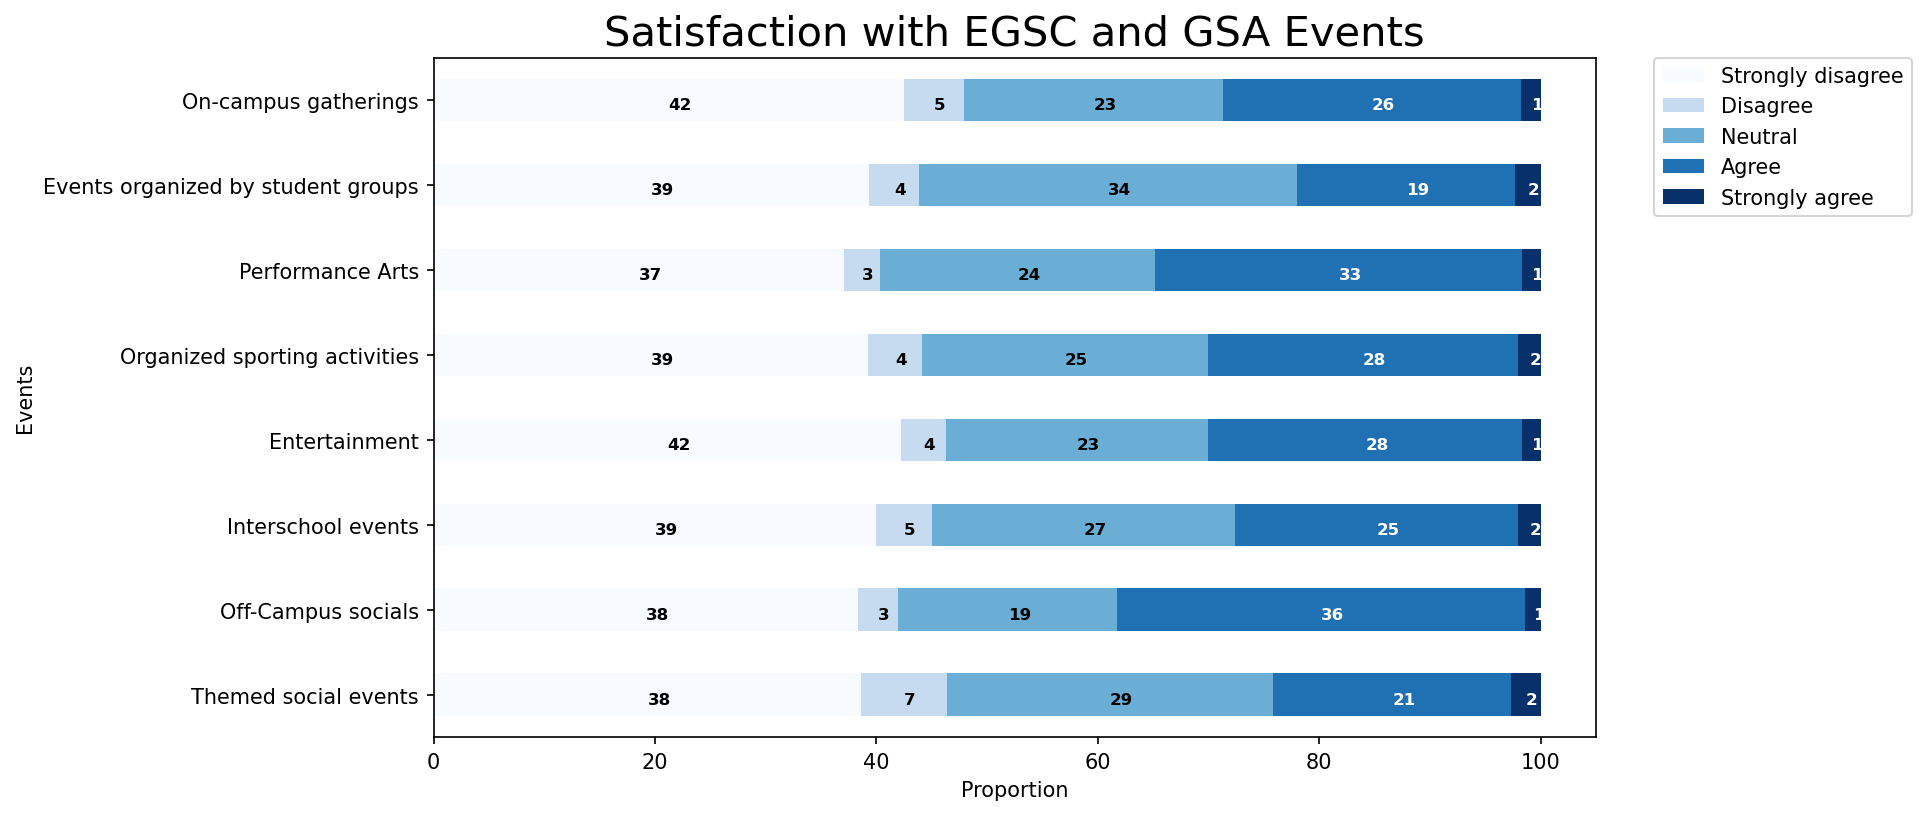

In [276]:
# stack chart

fig,ax = plt.subplots(figsize=(8,6), dpi=150)
stack_satisfy_events.sort_index().T.plot(kind='barh', 
                                         stacked=True, 
                                         colormap='Blues', 
                                         figsize=(10,6), 
                                         ax=ax)
plt.legend(agree_index[::-1], bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0., ncol=1)

plt.ylabel("Events")
plt.xlabel("Proportion")
plt.title("Satisfaction with EGSC and GSA Events", fontsize=20)

for n, x in enumerate([*c_stack_satisfy_events]):
    m=5
    for (proportion, count, y_loc) in zip(stack_satisfy_events_b.loc[x],
                                          stack_satisfy_events_a.loc[x],
                                          stack_satisfy_events_b.loc[x].cumsum()):
        if count == 0:
            m-=1
            continue
        if m<3:
            plt.text(x=((y_loc - proportion) + (proportion / 2)) * 100,
                     y=n - 0.11,
                     s=f'{str(count).split(".")[0]}', 
                     color="white",
                     fontsize=8,
                     fontweight="bold")
        if m>=3:
            plt.text(x=((y_loc - proportion) + (proportion / 2)) * 100,
                     y=n - 0.11,
                     s=f'{str(count).split(".")[0]}', 
                     color="black",
                     fontsize=8,
                     fontweight="bold")
        m-=1

plt.show()

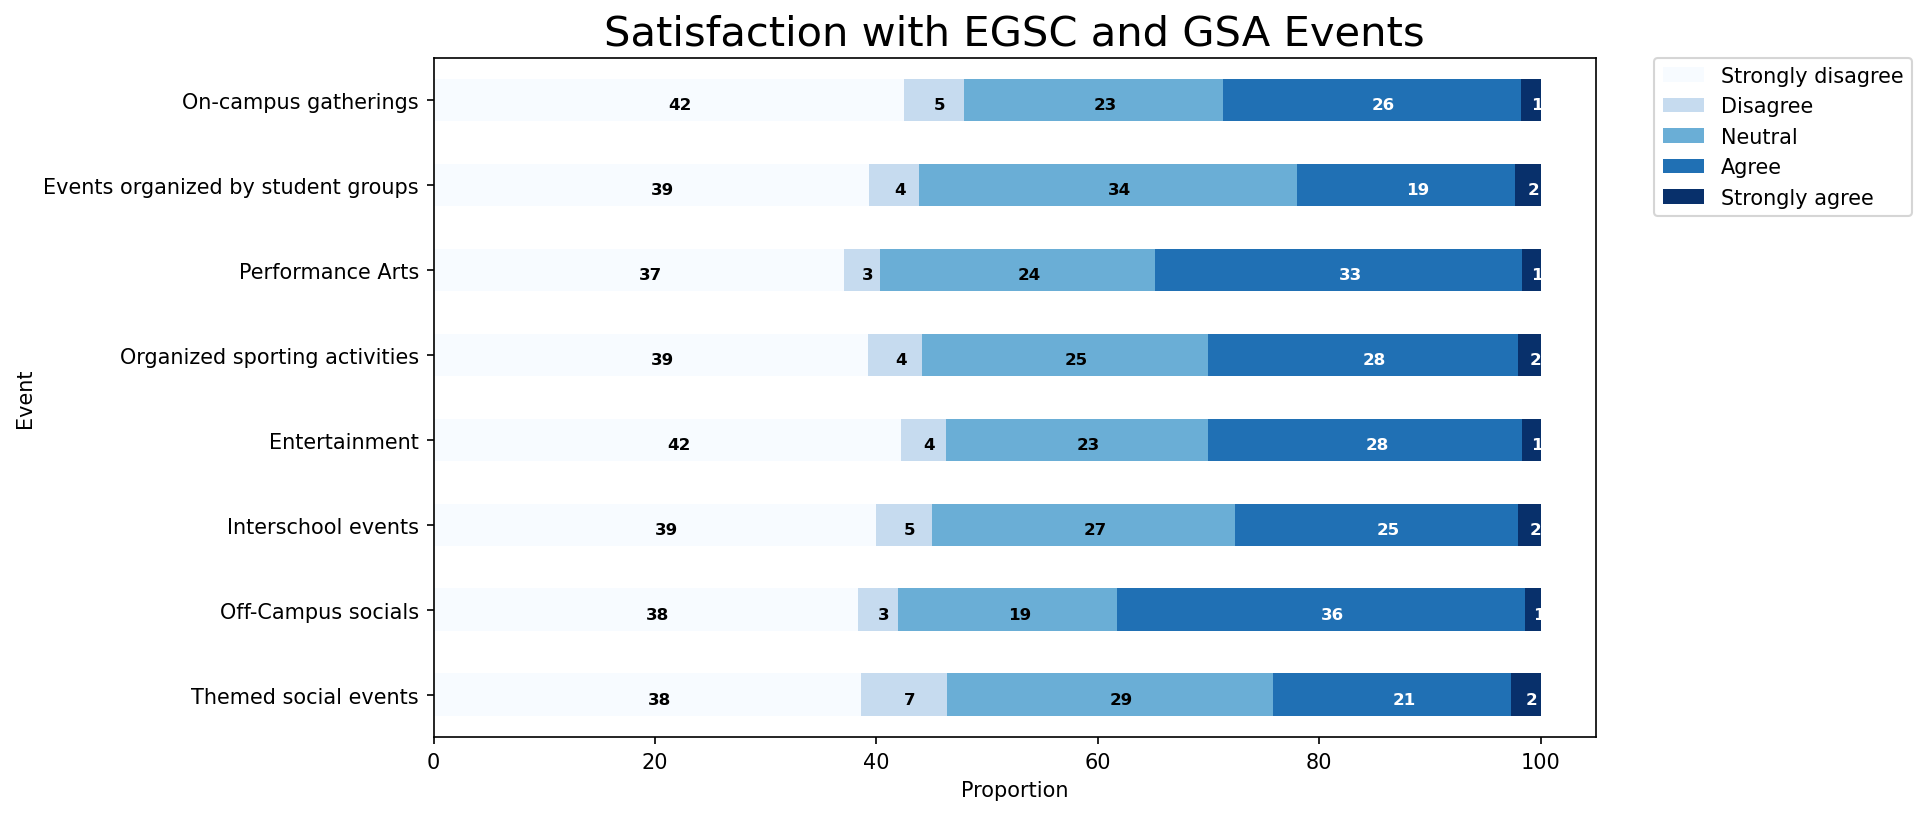

In [297]:
stack_func(stack_satisfy_events, "Proportion", "Event", "Satisfaction with EGSC and GSA Events", agree_index)

### Satisfaction with Peer-networking Events

In [277]:
peer_network = df[['GSA events (including orientation)', 
                   'Department-sponsored events',
                   'EGSC events',
                   'Other student group-sponsored events (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY)',
                   'Professional Development and Leadership (PDL) Program.2']]

peer_network

,GSA events (including orientation),Department-sponsored events,EGSC events,"Other student group-sponsored events (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY)",Professional Development and Leadership (PDL) Program.2
0,Agree,Agree,Agree,Agree,Not Applicable
2,Agree,Agree,Agree,Not Applicable,Agree
5,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
6,Neither agree nor disagree,Disagree,Disagree,Disagree,Disagree
7,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
...,...,...,...,...,...
1585,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Agree
1586,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1587,Not Applicable,Agree,Agree,Agree,Agree
1588,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree


In [278]:
agree_index_6 = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', 'Not Applicable']

def count_proportion_6(s):
    s_n = s.notna().sum()
    sa = s[s=='Strongly agree'].count() / s_n * 100
    a = s[s=='Agree'].count() / s_n * 100
    n = s[s=='Neither agree nor disagree'].count() / s_n * 100
    d = s[s=='Disagree'].count() / s_n * 100
    sd = s[s=='Strongly disagree'].count() / s_n * 100
    na = s[s=='Not Applicable'].count() / s_n * 100
    result = pd.Series(data=[sa, a, n, d, sd, na], 
                       index=agree_index_6)
    return(result)

In [279]:
stack_peernetwork_events = pd.concat([count_proportion_6(df['GSA events (including orientation)']),
                                      count_proportion_6(df['Department-sponsored events']), 
                                      count_proportion_6(df['EGSC events']),
                                      count_proportion_6(df['Other student group-sponsored events (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY)']),
                                      count_proportion_6(df['Professional Development and Leadership (PDL) Program.2'])], axis=1)

c_stack_peernetwork_events = ['GSA events', 
                              'Department-sponsored events',
                              'EGSC events',
                              'Other student group-sponsored events',
                              'PDL']

stack_peernetwork_events.columns = c_stack_peernetwork_events

stack_peernetwork_events

,GSA events,Department-sponsored events,EGSC events,Other student group-sponsored events,PDL
Strongly agree,19.826908,22.501967,23.682140,16.837136,17.859953
Agree,34.854445,34.933124,35.562549,22.344611,25.098348
Neutral,25.019670,23.210071,23.367427,33.280881,27.301338
Disagree,6.687648,6.372935,5.350118,8.418568,14.319434
Strongly disagree,3.855232,3.619197,3.068450,4.091267,6.845004
Not Applicable,9.756098,9.362707,8.969315,15.027537,8.575924


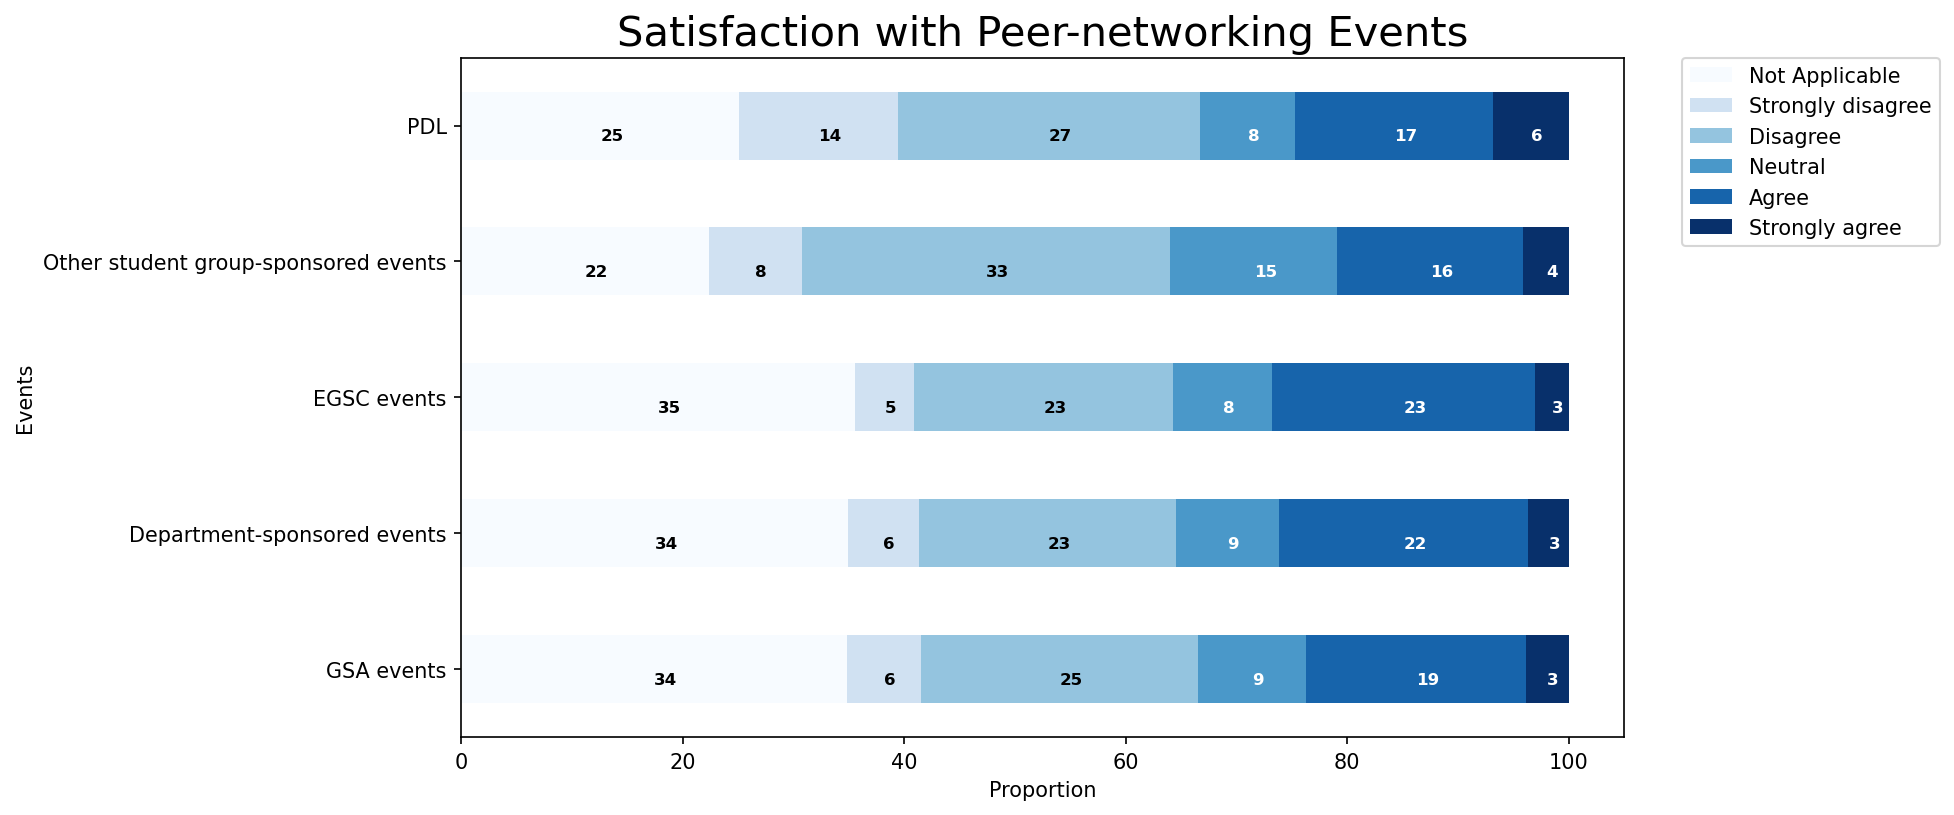

In [282]:
stack_peernetwork_events_prop = stack_peernetwork_events.apply(lambda x: x / x.sum(), axis=0)

stack_peernetwork_events_a = stack_peernetwork_events.sort_index().T
stack_peernetwork_events_b = stack_peernetwork_events_prop.sort_index().T

# stack chart

fig,ax = plt.subplots(figsize=(8,6), dpi=150)
stack_peernetwork_events.sort_index().T.plot(kind='barh', 
                                         stacked=True, 
                                         colormap='Blues', 
                                         figsize=(10,6), 
                                         ax=ax)
plt.legend(agree_index_6[::-1], bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0., ncol=1)

plt.ylabel("Events")
plt.xlabel("Proportion")
plt.title("Satisfaction with Peer-networking Events", fontsize=20)

for n, x in enumerate([*]):
    m=5
    for (proportion, count, y_loc) in zip(stack_peernetwork_events_b.loc[x],
                                          stack_peernetwork_events_a.loc[x],
                                          stack_peernetwork_events_b.loc[x].cumsum()):
        
        if m<3:
            plt.text(x=((y_loc - proportion) + (proportion / 2))*100,
                     y=n - 0.11,
                     s=f'{str(count).split(".")[0]}', 
                     color="white",
                     fontsize=8,
                     fontweight="bold")
        if m>=3:
            plt.text(x=((y_loc - proportion) + (proportion / 2))*100,
                     y=n - 0.11,
                     s=f'{str(count).split(".")[0]}', 
                     color="black",
                     fontsize=8,
                     fontweight="bold")
        m-=1

plt.show()

In [295]:
def stack_func(t, xlabel, ylabel, title, index):
    t_prop = t.apply(lambda x: x / x.sum(), axis=0)

    t_a = t.sort_index().T
    t_b = t_prop.sort_index().T

    # stack chart

    fig,ax = plt.subplots(figsize=(8,6), dpi=150)
    t.sort_index().T.plot(kind='barh', 
                                             stacked=True, 
                                             colormap='Blues', 
                                             figsize=(10,6), 
                                             ax=ax)
    plt.legend(index[::-1], bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0., ncol=1)

    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title, fontsize=20)

    for n, x in enumerate([*t.columns]):
        m=5
        for (proportion, count, y_loc) in zip(t_b.loc[x],
                                              t_a.loc[x],
                                              t_b.loc[x].cumsum()):

            if m<3:
                plt.text(x=((y_loc - proportion) + (proportion / 2))*100,
                         y=n - 0.11,
                         s=f'{str(count).split(".")[0]}', 
                         color="white",
                         fontsize=8,
                         fontweight="bold")
            if m>=3:
                plt.text(x=((y_loc - proportion) + (proportion / 2))*100,
                         y=n - 0.11,
                         s=f'{str(count).split(".")[0]}', 
                         color="black",
                         fontsize=8,
                         fontweight="bold")
            m-=1

    plt.show()

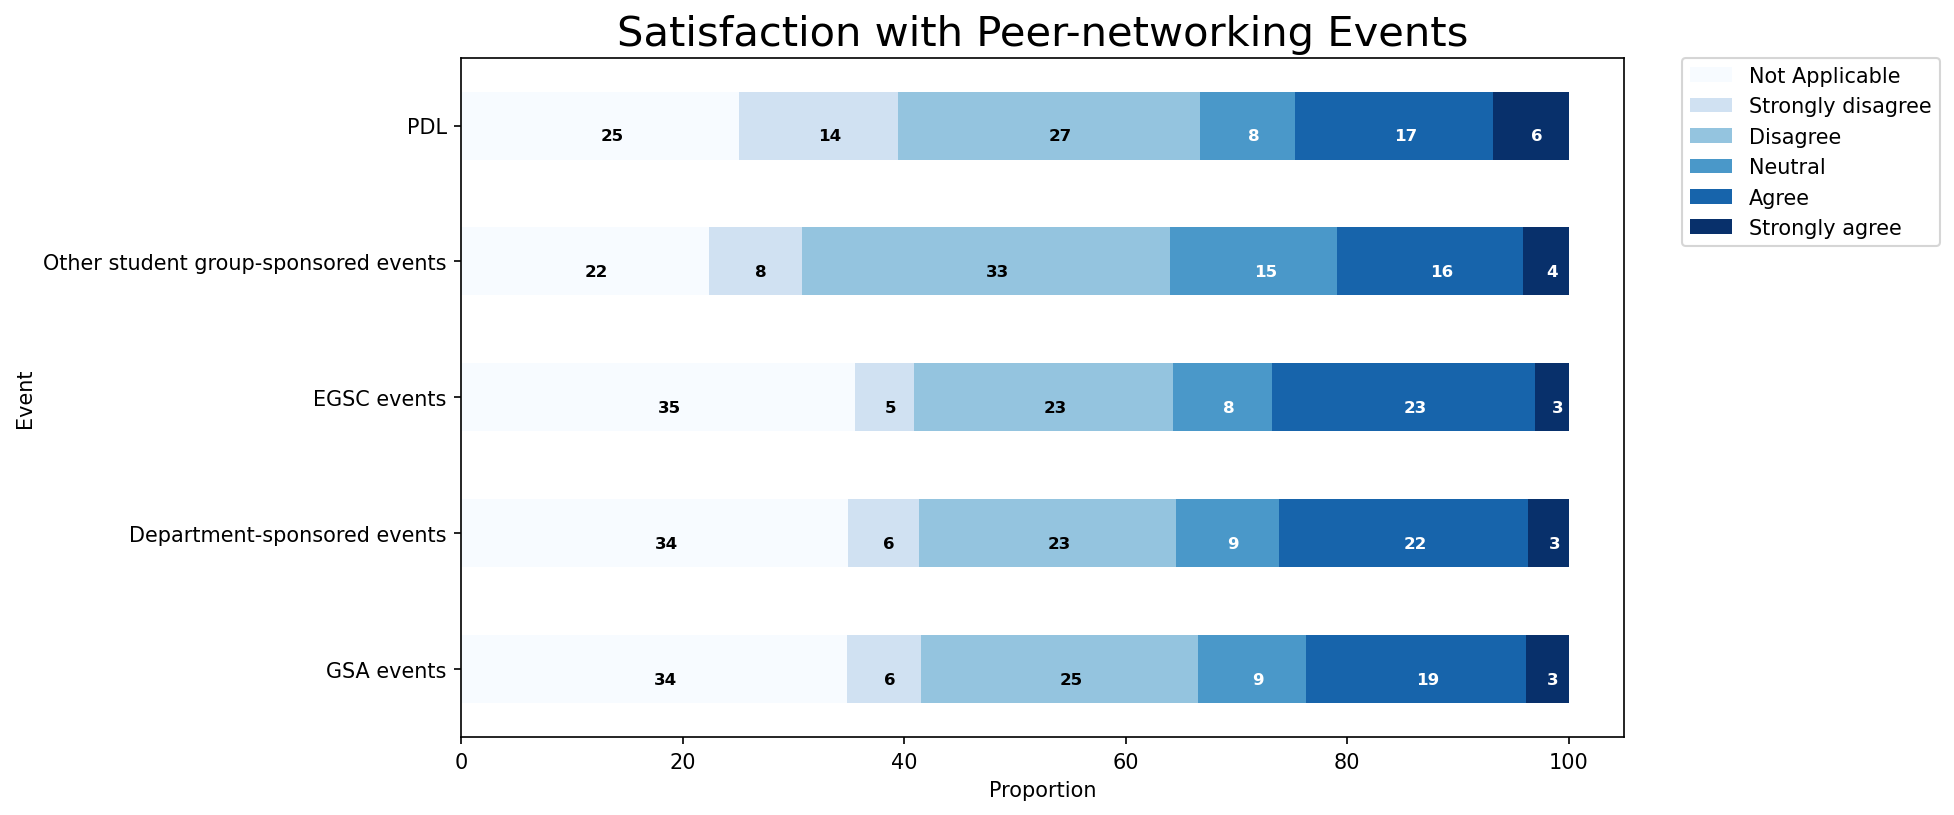

In [296]:
stack_func(stack_peernetwork_events, "Proportion", "Event", "Satisfaction with Peer-networking Events", agree_index_6)

### Acclimation as a Result of Orientation

In [285]:
orientation = df[['University resources', 
                  'Columbia campus',
                  'New York City', 
                  'My department', 
                  'Student groups',
                  'EGSC/Office of Graduate Student Affairs']]
orientation

,University resources,Columbia campus,New York City,My department,Student groups,EGSC/Office of Graduate Student Affairs
0,Neither agree nor disagree,Agree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Agree
2,Agree,Agree,Agree,Agree,Agree,Agree
5,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
6,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Agree
7,Neither agree nor disagree,Agree,Disagree,Agree,Disagree,Neither agree nor disagree
...,...,...,...,...,...,...
1585,Agree,Agree,Agree,Agree,Agree,Agree
1586,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1587,Neither agree nor disagree,Agree,Strongly disagree,Agree,Agree,Agree
1588,Agree,Agree,Agree,Agree,Agree,Agree


In [286]:
orientation['University resources'].value_counts()

Agree                         629
Neither agree nor disagree    288
Strongly agree                171
Disagree                      113
Strongly disagree              70
Name: University resources, dtype: int64

In [300]:
orientation_t = pd.concat([count_proportion(df['University resources']), 
                           count_proportion(df['Columbia campus']), 
                           count_proportion(df['New York City']), 
                           count_proportion(df['My department']), 
                           count_proportion(df['Student groups']), 
                           count_proportion(df['EGSC/Office of Graduate Student Affairs'])], axis=1)

c_orientation_t = ['University resources', 
                          'Columbia campus',
                          'New York City', 
                          'My department', 
                          'Student groups',
                          'EGSC/Office of Graduate Student Affairs']

orientation_t.columns = c_orientation_t

orientation_t

University resources                       100.0
Columbia campus                            100.0
New York City                              100.0
My department                              100.0
Student groups                             100.0
EGSC/Office of Graduate Student Affairs    100.0
dtype: float64

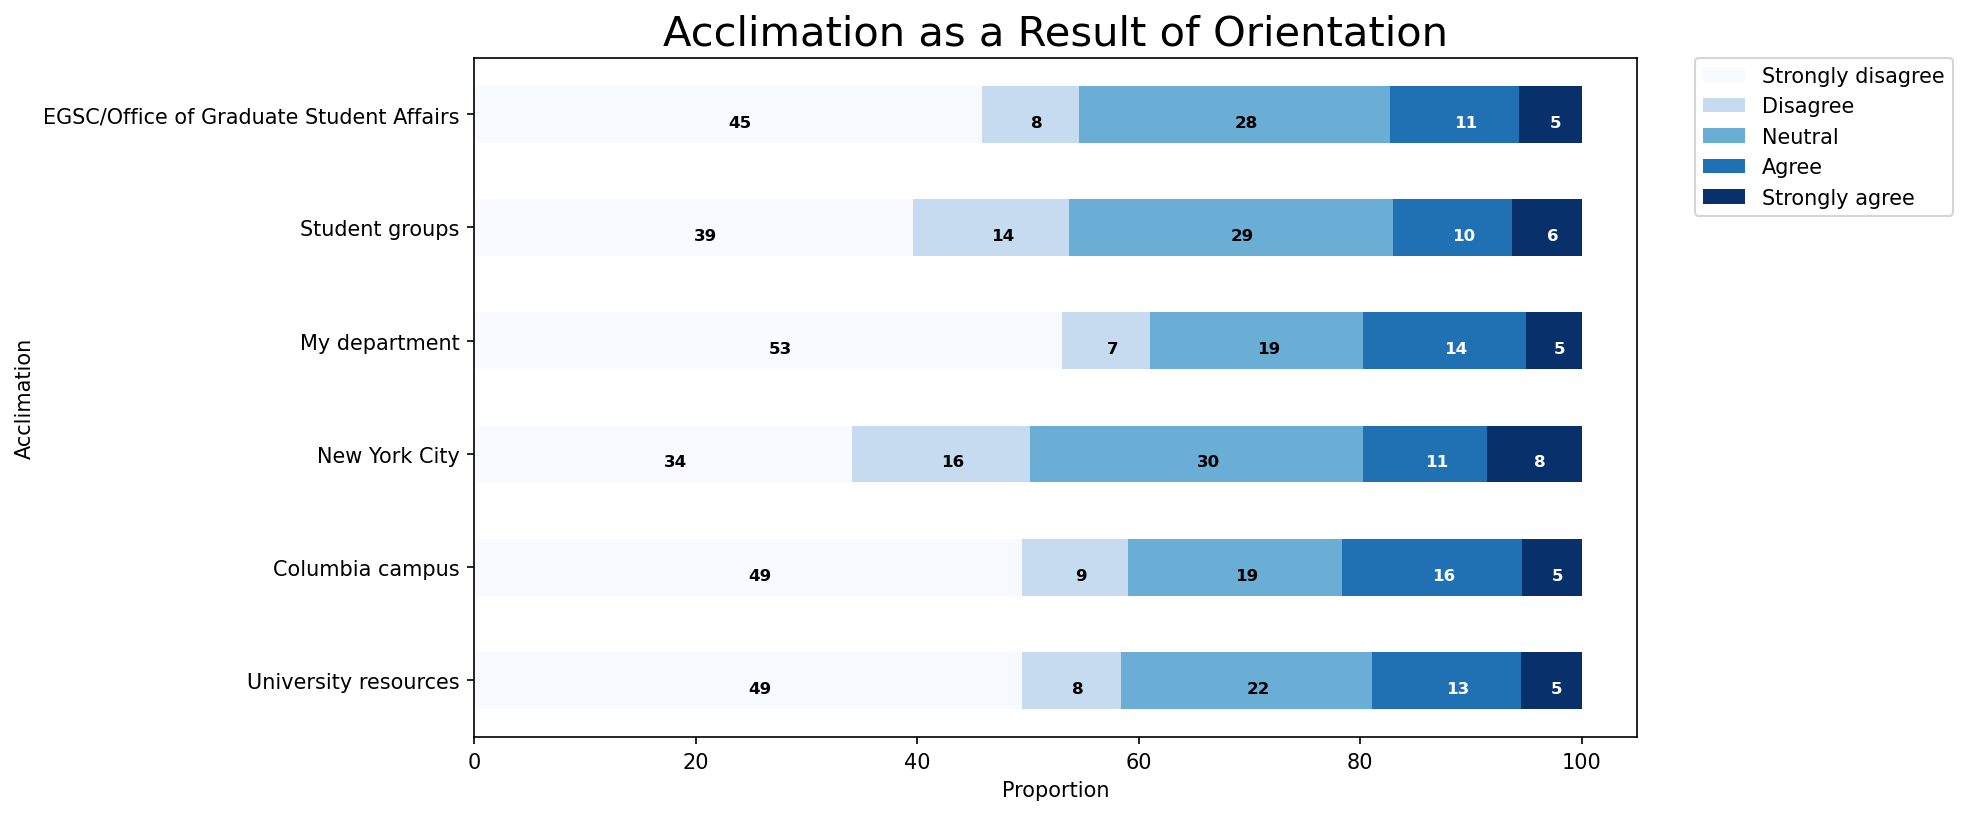

In [301]:
stack_func(orientation_t, "Proportion", "Acclimation", "Acclimation as a Result of Orientation", agree_index)